In [453]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from datetime import timedelta
import operator
plt.style.use('seaborn')
%matplotlib inline

In [454]:
#Load confirmed_cases Dataset
confirmed_cases = pd.read_csv('Datasets/covid_19_india.csv')
confirmed_cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [455]:
#Load deaths_reported Dataset
deaths_reported = pd.read_csv('Datasets/covid_19_india.csv')
deaths_reported.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [456]:
#Load deaths_reported Dataset
recovered_cases = pd.read_csv('Datasets/covid_19_india.csv')
recovered_cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [457]:
#Converting confirmed_cases dataset into a timeseries Dataset
confirmed_cases.drop(confirmed_cases.columns[[0, 2, 4, 5, 6, 7]], axis = 1, inplace = True)
confirmed_cases = confirmed_cases.groupby(['State/UnionTerritory', 'Date'], sort=False)['Confirmed'].sum().unstack('Date')
confirmed_cases.columns.name = None
confirmed_cases.fillna(0, inplace=True)
confirmed_cases.reset_index(level=0, inplace=True)
confirmed_cases.head()

,State/UnionTerritory,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,...,19/04/20,20/04/20,21/04/20,22/04/20,23/04/20,24/04/20,25/04/20,26/04/20,27/04/20,28/04/20
0,Kerala,1.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,400.0,402.0,408.0,427.0,438.0,448.0,451.0,458.0,469.0,482.0
1,Telengana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,844.0,873.0,919.0,945.0,960.0,984.0,984.0,991.0,1002.0,1004.0
2,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1893.0,2003.0,2081.0,2156.0,2248.0,2376.0,2514.0,2625.0,2918.0,3108.0
3,Rajasthan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1351.0,1478.0,1576.0,1801.0,1890.0,1964.0,2034.0,2083.0,2185.0,2262.0
4,Uttar Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1084.0,1176.0,1294.0,1412.0,1509.0,1604.0,1778.0,1843.0,1955.0,2043.0


In [458]:
#Converting deaths_reported dataset into a timeseries Dataset
deaths_reported.drop(deaths_reported.columns[[0, 2, 4, 5, 6, 8]], axis = 1, inplace = True)
deaths_reported = deaths_reported.groupby(['State/UnionTerritory', 'Date'], sort=False)['Deaths'].sum().unstack('Date')
deaths_reported.columns.name = None
deaths_reported.fillna(0, inplace=True)
deaths_reported.reset_index(level=0, inplace=True)
deaths_reported.head()

,State/UnionTerritory,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,...,19/04/20,20/04/20,21/04/20,22/04/20,23/04/20,24/04/20,25/04/20,26/04/20,27/04/20,28/04/20
0,Kerala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
1,Telengana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,21.0,23.0,23.0,24.0,26.0,26.0,26.0,26.0,26.0
2,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,45.0,47.0,47.0,48.0,50.0,53.0,54.0,54.0,54.0
3,Rajasthan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,14.0,25.0,25.0,27.0,27.0,27.0,33.0,41.0,46.0
4,Uttar Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,17.0,20.0,21.0,21.0,24.0,26.0,29.0,31.0,31.0


In [459]:
#Converting recovered_cases dataset into a timeseries Dataset
recovered_cases.drop(recovered_cases.columns[[0, 2, 4, 5, 7, 8]], axis = 1, inplace = True)
recovered_cases = recovered_cases.groupby(['State/UnionTerritory', 'Date'], sort=False)['Cured'].sum().unstack('Date')
recovered_cases.columns.name = None
recovered_cases.fillna(0, inplace=True)
recovered_cases.reset_index(level=0, inplace=True)
recovered_cases.head()

,State/UnionTerritory,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,...,19/04/20,20/04/20,21/04/20,22/04/20,23/04/20,24/04/20,25/04/20,26/04/20,27/04/20,28/04/20
0,Kerala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,257.0,270.0,291.0,323.0,324.0,324.0,331.0,338.0,342.0,355.0
1,Telengana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,186.0,190.0,190.0,194.0,197.0,253.0,253.0,280.0,280.0,321.0
2,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,290.0,431.0,611.0,724.0,808.0,857.0,869.0,877.0,877.0
3,Rajasthan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,183.0,183.0,205.0,230.0,230.0,230.0,230.0,493.0,518.0,669.0
4,Uttar Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,108.0,129.0,140.0,165.0,187.0,206.0,248.0,289.0,335.0,400.0


In [460]:
#Extracting only Dates columns that have information of confirmed,Deaths
cols = confirmed_cases.keys()
confirmed = confirmed_cases.loc[:, cols[1]:cols[-1]]
deaths = deaths_reported.loc[:, cols[1]:cols[-1]]
recovered = recovered_cases.loc[:, cols[1]:cols[-1]]

In [461]:
#Finding the total confirmed cases, death cases and the recovered cases and append them to an 3 empty lists
#Also, calculate the total mortality rate which is the death_sum/confirmed_cases
dates = confirmed.keys()
country_cases = []
total_deaths = []
total_recovered = []
mortality_rate = []
active_cases = []
#Active cases = confirmed - deaths - recoveries 
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    active_cases.append(confirmed_sum-recovered_sum-death_sum)
    country_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)

In [462]:
#Convert all the dates and the cases in the form of numpy array
days_since_jan_30 = np.array([i for i in range(len(dates))]).reshape(-1,1)
country_cases = np.array(country_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
active_cases = np.array(active_cases).reshape(-1,1)

In [463]:
#Future forecasting for the next 20 days
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-20]

In [464]:
#Covert all the integers into datatime for better visualization
start = '30/1/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [465]:
# Splitting Dataset
X_train_confirmed, X_test_confirmed, Y_train_confirmed, Y_test_confirmed = train_test_split(days_since_jan_30, country_cases, test_size=0.30, shuffle=False)

X1_train_confirmed, X1_test_confirmed, Y1_train_confirmed, Y1_test_confirmed = train_test_split(days_since_jan_30, active_cases, test_size=0.30, shuffle=False)

X2_train_confirmed, X2_test_confirmed, Y2_train_confirmed, Y2_test_confirmed = train_test_split(days_since_jan_30, total_deaths, test_size=0.30, shuffle=False)

In [466]:
#transform our data for polynomial regression
poly = PolynomialFeatures(degree = 5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [467]:
#Polynomial Regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, Y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)

linear1_model = LinearRegression(normalize=True, fit_intercept=False)
linear1_model.fit(poly_X_train_confirmed, Y1_train_confirmed)
test1_linear_pred = linear1_model.predict(poly_X_test_confirmed)
linear1_pred = linear1_model.predict(poly_future_forecast)

linear2_model = LinearRegression(normalize=True, fit_intercept=False)
linear2_model.fit(poly_X_train_confirmed, Y2_train_confirmed)
test2_linear_pred = linear2_model.predict(poly_X_test_confirmed)
linear2_pred = linear2_model.predict(poly_future_forecast)

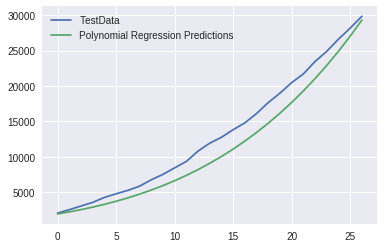

In [468]:
plt.plot(Y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['TestData', 'Polynomial Regression Predictions'])

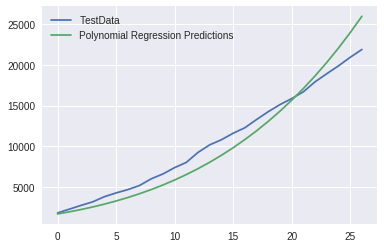

In [469]:
plt.plot(Y1_test_confirmed)
plt.plot(test1_linear_pred)
plt.legend(['TestData', 'Polynomial Regression Predictions'])

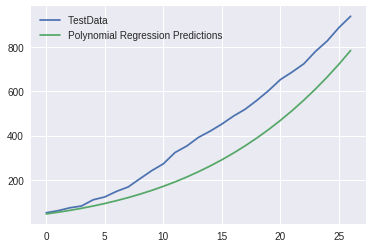

In [470]:
plt.plot(Y2_test_confirmed)
plt.plot(test2_linear_pred)
plt.legend(['TestData', 'Polynomial Regression Predictions'])

In [471]:
# Predicitons for the next 20 days using Polynomial Linear Regression
print('Next 20 days confirmed cases Predictions using polynomial Linear Regression')
df = pd.DataFrame(list(zip(future_forecast_dates[-20:], linear_pred[-20:])), 
               columns =['Date', 'ConfirmedCases']) 
df 

Next 20 days confirmed cases Predictions using polynomial Linear Regression


,Date,ConfirmedCases
0,29/04/2020,[31723.060693544045]
1,30/04/2020,[34300.73001864547]
2,01/05/2020,[37042.283355292704]
3,02/05/2020,[39955.34348915581]
4,03/05/2020,[43047.763496358384]
5,04/05/2020,[46327.63013163711]
6,05/05/2020,[49803.26721650209]
7,06/05/2020,[53483.23902739654]
8,07/05/2020,[57376.35368385649]
9,08/05/2020,[61491.66653667088]


In [472]:
# Predicitons for the next 20 days using Polynomial Linear Regression
print('Next 20 days active cases Predictions using polynomial Linear Regression')
df1 = pd.DataFrame(list(zip(future_forecast_dates[-20:], linear1_pred[-20:])), 
               columns =['Date', 'Active']) 
df1 

Next 20 days active cases Predictions using polynomial Linear Regression


,Date,Active
0,29/04/2020,[28076.83923501776]
1,30/04/2020,[30354.69344371873]
2,01/05/2020,[32777.1906031861]
3,02/05/2020,[35351.05196346124]
4,03/05/2020,[38083.20167439853]
5,04/05/2020,[40980.769769083956]
6,05/05/2020,[44051.095147253305]
7,06/05/2020,[47301.72855871025]
8,07/05/2020,[50740.435586744585]
9,08/05/2020,[54375.1996315507]


In [473]:
# Predicitons for the next 20 days using Polynomial Linear Regression
print('Next 20 days deaths Predictions using polynomial Linear Regression')
df2 = pd.DataFrame(list(zip(future_forecast_dates[-20:], linear2_pred[-20:])), 
               columns =['Date', 'Deaths']) 
df2

Next 20 days deaths Prediction using polynomial Linear Regression


,Date,Deaths
0,29/04/2020,[848.5373265946528]
1,30/04/2020,[918.4043989791849]
2,01/05/2020,[992.7451041805366]
3,02/05/2020,[1071.7682021970422]
4,03/05/2020,[1155.6887653522394]
5,04/05/2020,[1244.7282711140024]
6,05/05/2020,[1339.1146949136628]
7,06/05/2020,[1439.0826029651466]
8,07/05/2020,[1544.8732450840953]
9,08/05/2020,[1656.734647506999]


In [474]:
def sigmoid_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def gaussian_model(x,a,b,c):
    return a * np.exp(-0.5 * ((x-b)/c)**2)

from scipy.optimize import curve_fit
from scipy.optimize import fsolve


x=np.reshape(future_forecast, future_forecast.size)

y=np.reshape(linear_pred, linear_pred.size)

y1=np.reshape(linear1_pred, linear1_pred.size)

y2=np.reshape(linear2_pred, linear2_pred.size)

popt, pcov = curve_fit(sigmoid_model,x,y,p0=[2, 150, 5000], maxfev=9999)

popt1, pcov1 = curve_fit(gaussian_model,x,y1,p0=[1, 200, 100], maxfev=9999)

popt2, pcov2 = curve_fit(sigmoid_model,x,y2,p0=[2, 150, 600], maxfev=9999)

speed_error, x_peak_error, y_max_error = [np.sqrt(pcov[i][i]) for i in [0, 1, 2]]

sol = int(fsolve(lambda x : sigmoid_model(x,popt[0],popt[1],popt[2]) - int(popt[2]),popt[1]))

last_death = int(fsolve(lambda x : sigmoid_model(x,popt2[0],popt2[1],popt2[2]) - int(popt2[2]),popt2[1]))

pred_x = list(range(max(x),sol))

active = [gaussian_model(i,popt1[0],popt1[1],popt1[2]) for i in list(x)+pred_x]

active.index(max(active))

x_full = list(x)+pred_x


print("Peak Date:", datetime.datetime.strptime(start, '%d/%m/%Y') + timedelta(days=x_full[active.index(max(active))]))

print("End Date:", datetime.datetime.strptime(start, '%d/%m/%Y') + timedelta(days=sol))

Peak Date: 2020-07-05 00:00:00
End Date: 2020-09-08 00:00:00


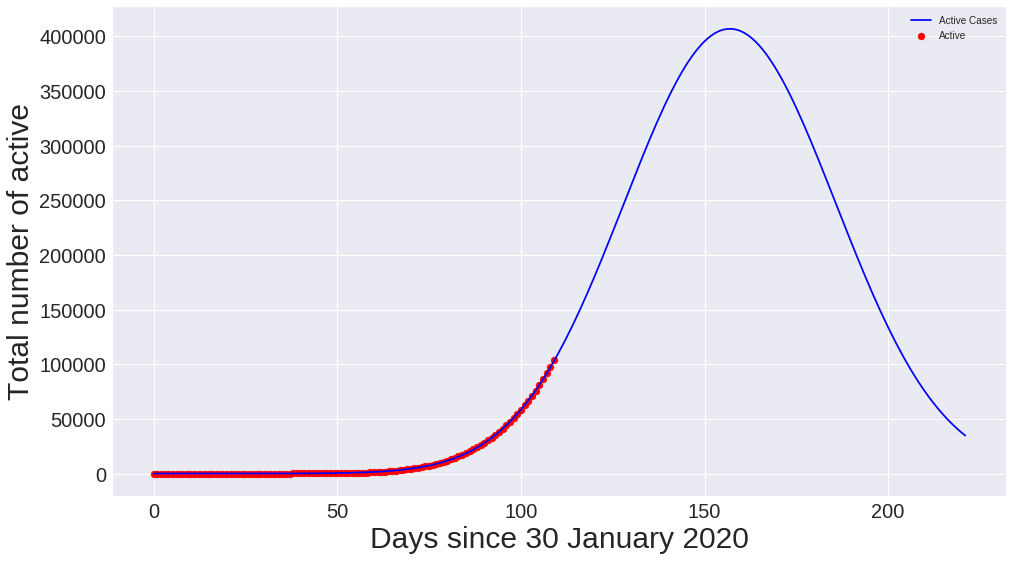

In [475]:
pred_x = list(range(max(x),sol))
plt.figure(figsize=(16, 9))
plt.scatter(x,y1,label="Active",color="red")
plt.plot(list(x)+pred_x, [gaussian_model(i,popt1[0],popt1[1],popt1[2]) for i in list(x)+pred_x], label="Active Cases", color='blue')
plt.legend()
plt.xlabel("Days since 30 January 2020",size=30)
plt.ylabel("Total number of active",size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()